In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline

In [2]:
from rename import *

In [3]:
summary = pd.read_csv('data/atussum_2014.dat') 

In [4]:
summary.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
summary = summary.rename(columns=rename_summary)

In [6]:
summary.head()

,case_id,stat_weight,age_youngest_child,age,sex,high_levl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


# Participating in Sports and Physical Activities

In [7]:
participating = summary[['case_id', 'high_levl_edu', 'race', 'metro', 'age', 'sex', 'hs_or_col',
                             'num_of_children', 'Tobacco and drug use', 'Doing aerobics',
                             'Playing baseball', 'Playing basketball', 'Biking',
                             'Playing billiards', 'Boating', 'Bowling',
                             'Climbing, spelunking, caving', 'Dancing',
                             'Participating in equestrian sports', 'Fishing',
                             'Playing football', 'Golfing', 'Doing gymnastics',
                             'Hiking', 'Playing hockey', 'Hunting',
                             'Participating in martial arts', 'Playing racquet sports',
                             'Rollerblading', 'Running', 'Skiing, ice skating, snowboarding',
                             'Playing soccer', 'Softball', 'Using cardiovascular equipment',
                             'Vehicle touring/racing', 'Playing volleyball', 'Walking',
                             'Participating in water sports', 'Weightlifting/strength training',
                             'Working out, unspecified', 'Doing yoga', 'Playing sports n.e.c.*']]

In [8]:
participating['all_activities'] = (summary['Doing aerobics']+summary['Playing baseball']+summary['Playing basketball']+summary['Biking']+summary['Playing billiards']+summary['Boating']+summary['Bowling']+summary['Climbing, spelunking, caving']+summary['Dancing']+summary['Participating in equestrian sports']+summary['Fishing']+summary['Playing football']+summary['Golfing']+summary['Doing gymnastics']+summary['Hiking']+summary['Playing hockey']+summary['Hunting']+summary['Participating in martial arts']+summary['Playing racquet sports']+summary['Rollerblading']+summary['Running']+summary['Skiing, ice skating, snowboarding']+summary['Playing soccer']+summary['Softball']+summary['Using cardiovascular equipment']+summary['Vehicle touring/racing']+summary['Playing volleyball']+summary['Walking']+summary['Participating in water sports']+summary['Weightlifting/strength training']+summary['Working out, unspecified']+summary['Doing yoga']+summary['Playing sports n.e.c.*'])

/Users/TK/tiy/week4/.direnv/python-3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
participating.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Doing aerobics,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,all_activities
0,20140101140007,39,1,1,20,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,90
1,20140101140011,37,2,1,16,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,38,1,1,65,2,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,39,2,2,50,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,39,2,2,23,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print('People surveyed spent a mean of {} minutes participating in sports and other physical activities.'.format(participating['all_activities'].mean()))

People surveyed spent a mean of 16.885783298826777 minutes participating in sports and other physical activities.


In [11]:
any_participating = participating[participating.all_activities > 0]

In [12]:
no_participating = participating[participating.all_activities == 0]

In [13]:
any_participating.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Doing aerobics,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,all_activities
0,20140101140007,39,1,1,20,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,90
7,20140101140610,42,1,1,28,1,-1,1,0,0,...,0,0,0,30,0,0,0,0,0,30
9,20140101140639,44,1,1,85,1,-1,0,0,0,...,30,0,0,0,0,0,0,0,0,30
18,20140101140852,43,1,1,67,1,-1,0,0,0,...,0,0,0,0,0,0,60,0,0,60
28,20140101140973,40,5,1,62,1,-1,0,0,0,...,0,0,0,0,0,0,120,0,0,120


In [14]:
no_participating.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Doing aerobics,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,all_activities
1,20140101140011,37,2,1,16,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,38,1,1,65,2,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,39,2,2,50,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,39,2,2,23,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20140101140537,36,2,1,85,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


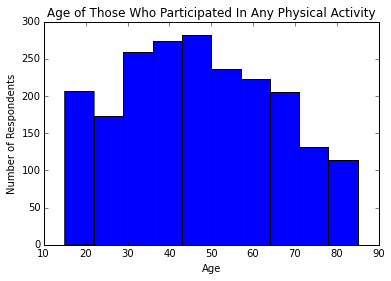

People surveyed who spent any time participating in sports and other physical activities had a mean age of 46.71611982881598.


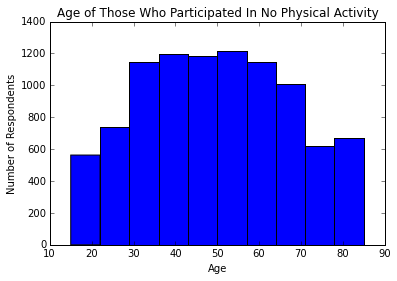

People surveyed who spent no time participating in sports and other physical activities had a mean age of 49.258404468331754.


In [15]:
any_participating['age'].plot(kind='hist', bins=10, title='Age of Those Who Participated In Any Physical Activity')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time participating in sports and other physical activities had a mean age of {}.'.format(any_participating['age'].mean()))

no_participating['age'].plot(kind='hist', bins=10,title='Age of Those Who Participated In No Physical Activity')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time participating in sports and other physical activities had a mean age of {}.'.format(no_participating['age'].mean()))

In [16]:
print('There was a correlation of {} between age and the amount of time spent participating in sports and other physical activities.'.format(participating['age'].corr(participating['all_activities'])))

There was a correlation of -0.08314367945265462 between age and the amount of time spent participating in sports and other physical activities.


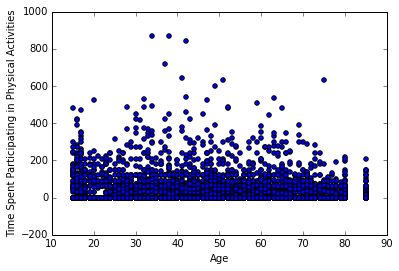

In [17]:
participating.plot(kind='scatter', x='age', y='all_activities')
plt.xlabel('Age')
plt.ylabel('Time Spent Participating in Physical Activities')
plt.show()

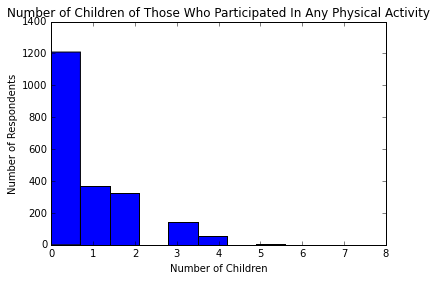

People surveyed who spent any time participating in sports and other physical activities had a mean 0.8074179743223966 children.


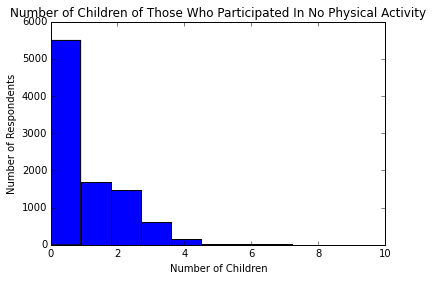

People surveyed who spent no time participating in sports and other physical activities had a mean of 0.7857519232795869 children.


In [18]:
any_participating['num_of_children'].plot(kind='hist', bins=10, title='Number of Children of Those Who Participated In Any Physical Activity')
plt.xlabel('Number of Children')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time participating in sports and other physical activities had a mean {} children.'.format(any_participating['num_of_children'].mean()))

no_participating['num_of_children'].plot(kind='hist', bins=10,title='Number of Children of Those Who Participated In No Physical Activity')
plt.xlabel('Number of Children')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time participating in sports and other physical activities had a mean of {} children.'.format(no_participating['num_of_children'].mean()))

In [19]:
print('There was a correlation of {} between number of children and the amount of time spent participating in sports and other physical activities.'.format(participating['all_activities'].corr(participating['num_of_children'])))

There was a correlation of 0.024320980627796814 between number of children and the amount of time spent participating in sports and other physical activities.


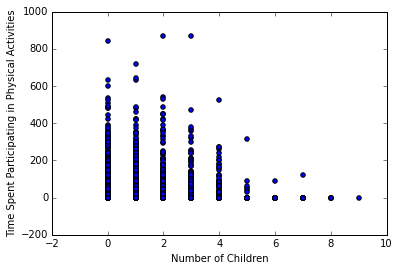

In [20]:
participating.plot(kind='scatter', x='num_of_children', y='all_activities')
plt.xlabel('Number of Children')
plt.ylabel('Time Spent Participating in Physical Activities')
plt.show()

In [21]:
female = participating[participating['sex'] == 2]

male = participating[participating['sex'] == 1]

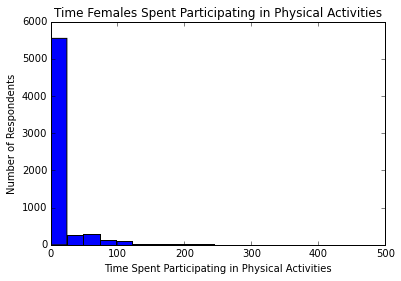

Females surveyed spent a mean of 11.89239332096475 minutes participating in physical activities.


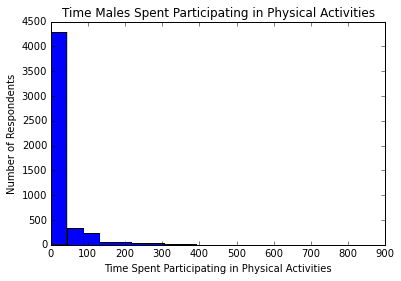

Males surveyed spent a mean of 23.188914910226387 minutes participating in physical activities.


In [22]:
female['all_activities'].plot(kind='hist',bins=20, title='Time Females Spent Participating in Physical Activities')
plt.xlabel('Time Spent Participating in Physical Activities')
plt.ylabel('Number of Respondents')
plt.show()

print('Females surveyed spent a mean of {} minutes participating in physical activities.'.format(female['all_activities'].mean()))

male['all_activities'].plot(kind='hist',bins=20, title='Time Males Spent Participating in Physical Activities')
plt.xlabel('Time Spent Participating in Physical Activities')
plt.ylabel('Number of Respondents')
plt.show()

print('Males surveyed spent a mean of {} minutes participating in physical activities.'.format(male['all_activities'].mean()))

The above data shows that those who participated in any amount of physical activity had a younger mean age than those who did not participated in any amount of physical activity. The data shows a negative correlation between age and the amount of time spent participating in physical activities. The data also points towards correlation between the number of children in the household the amount of time spent participating in physical activity decreases. Lastly the data shows that male respondents spent twice the time participating in physical activities as female respondents.

## Tobacco and Drug Use

In [23]:
no_tandd = participating[participating['Tobacco and drug use'] > 0]
any_tandd = participating[participating['Tobacco and drug use'] == 0]

In [24]:
no_tandd.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Doing aerobics,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,all_activities
21,20140101140875,43,1,1,62,1,-1,0,10,0,...,0,0,0,0,0,0,0,0,0,0
111,20140110131176,39,1,1,51,2,-1,1,15,0,...,0,0,0,0,0,0,0,0,0,0
171,20140111130952,39,1,1,54,1,-1,1,60,0,...,0,0,0,0,0,0,0,0,0,0
228,20140111131573,40,4,1,21,1,2,0,5,0,...,0,0,0,0,0,0,0,0,0,0
281,20140111132403,39,1,1,36,1,-1,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
any_tandd.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Doing aerobics,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,all_activities
0,20140101140007,39,1,1,20,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,90
1,20140101140011,37,2,1,16,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,38,1,1,65,2,-1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,39,2,2,50,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,39,2,2,23,2,-1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


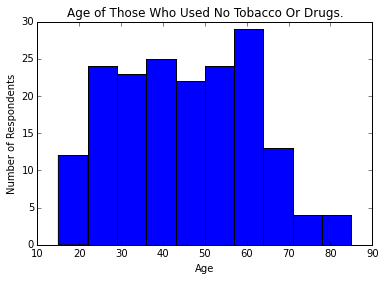

People surveyed who spent no time using tobacco or drugs had an average age of 48.865667718191375.


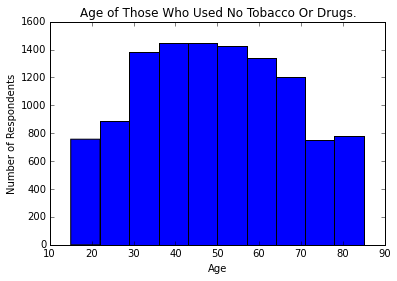

People surveyed who spent any time using tobacco or drugs had an average age of 44.455555555555556.


In [26]:
no_tandd['age'].plot(kind='hist', bins=10, title='Age of Those Who Used No Tobacco Or Drugs.')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time using tobacco or drugs had an average age of {}.'.format(any_tandd['age'].mean()))

any_tandd['age'].plot(kind='hist', bins=10, title='Age of Those Who Used No Tobacco Or Drugs.')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time using tobacco or drugs had an average age of {}.'.format(no_tandd['age'].mean()))


In [27]:
print('There was a correlation of {} between time using tobacco or drugs and the age of the respondents.'.format(participating['age'].corr(participating['Tobacco and drug use'])))

There was a correlation of -0.012527764390442089 between time using tobacco or drugs and the age of the respondents.


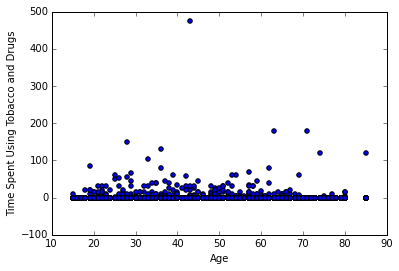

In [28]:
participating.plot(kind='scatter', x='age', y='Tobacco and drug use')
plt.xlabel('Age')
plt.ylabel('Time Spent Using Tobacco and Drugs')
plt.show()

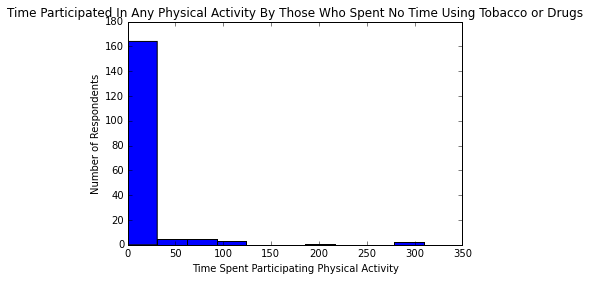

People surveyed who spent no time using tobacco or drugs participated in a mean of 10.472222222222221 minutes of physical activity.


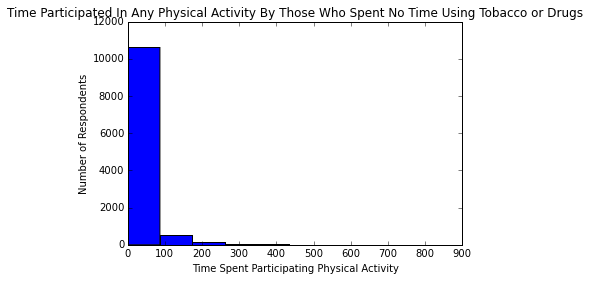

People surveyed who spent any time using tobacco or drugs participated in a mean of 16.986943568173853 minutes of physical activity.


In [29]:
no_tandd['all_activities'].plot(kind='hist', bins=10, title='Time Participated In Any Physical Activity By Those Who Spent No Time Using Tobacco or Drugs')
plt.xlabel('Time Spent Participating Physical Activity')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time using tobacco or drugs participated in a mean of {} minutes of physical activity.'.format(no_tandd['all_activities'].mean()))

any_tandd['all_activities'].plot(kind='hist', bins=10, title='Time Participated In Any Physical Activity By Those Who Spent No Time Using Tobacco or Drugs')
plt.xlabel('Time Spent Participating Physical Activity')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time using tobacco or drugs participated in a mean of {} minutes of physical activity.'.format(any_tandd['all_activities'].mean()))

In [30]:
print('There was a correlation of {} between time using tobacco or drugs and the number of minutes of physical activity.'.format(participating['all_activities'].corr(participating['Tobacco and drug use'])))

There was a correlation of -0.005585310627762211 between time using tobacco or drugs and the number of minutes of physical activity.


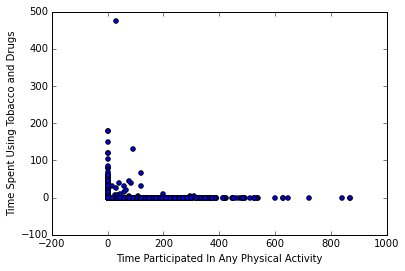

In [31]:
participating.plot(kind='scatter', x='all_activities', y='Tobacco and drug use')
plt.xlabel('Time Participated In Any Physical Activity')
plt.ylabel('Time Spent Using Tobacco and Drugs')
plt.show()

In [32]:
f_tandd = participating[participating['sex'] == 2]
m_tandd = participating[participating['sex'] == 1]

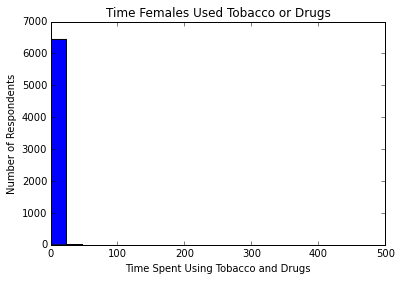

Females surveyed spent a mean of 0.4197588126159555 minutes using tobacco and drugs.


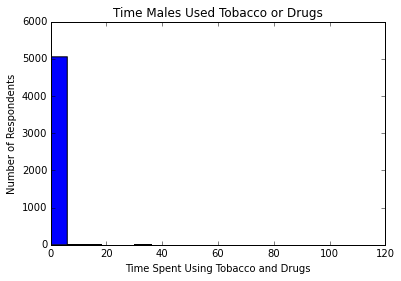

Males surveyed spent a mean of 0.3914910226385636 minutes using tobacco and drugs.


In [33]:
f_tandd['Tobacco and drug use'].plot(kind='hist',bins=20, title='Time Females Used Tobacco or Drugs')
plt.xlabel('Time Spent Using Tobacco and Drugs')
plt.ylabel('Number of Respondents')
plt.show()

print('Females surveyed spent a mean of {} minutes using tobacco and drugs.'.format(f_tandd['Tobacco and drug use'].mean()))

m_tandd['Tobacco and drug use'].plot(kind='hist',bins=20, title='Time Males Used Tobacco or Drugs')
plt.xlabel('Time Spent Using Tobacco and Drugs')
plt.ylabel('Number of Respondents')
plt.show()

print('Males surveyed spent a mean of {} minutes using tobacco and drugs.'.format(m_tandd['Tobacco and drug use'].mean()))

The above data shows that the mean age of respondents who spent no time using tobacco or drugs was higher than the mean age of those who spent any time using tobacco or drugs. There was also a slight negative correlation between increased age and a lower amount of time using tobacco or drugs. The data also shows that respondents who spent any time participating in a physical activities spent more time using tobacco or drugs than those who spent no time participating in a physical activities. Lastly the data showed that on average females spent slightly more time using tobacco and drugs than males did.

# Religious Data

In [34]:
religious_data = summary[['case_id', 'high_levl_edu', 'race', 'metro', 'age', 'sex', 
                          'hs_or_col', 'num_of_children', 'Tobacco and drug use', 
                          'Attending religious services', 
                          'Participation in religious practices', 
                          'Waiting associated w/religious & spiritual activities', 
                          'Security procedures rel. to religious & spiritual activities', 
                          'Religious education activities', 
                          'Religious and spiritual activities, n.e.c.*']]

In [35]:
total_religious_data = religious_data.copy()

In [36]:
total_religious_data["all_religious_activity"] = (religious_data['Attending religious services']+religious_data['Participation in religious practices']+religious_data['Waiting associated w/religious & spiritual activities']+religious_data['Security procedures rel. to religious & spiritual activities']+religious_data['Religious education activities']+religious_data['Religious and spiritual activities, n.e.c.*'])

In [37]:
total_religious_data.head()

,case_id,high_levl_edu,race,metro,age,sex,hs_or_col,num_of_children,Tobacco and drug use,Attending religious services,Participation in religious practices,Waiting associated w/religious & spiritual activities,Security procedures rel. to religious & spiritual activities,Religious education activities,"Religious and spiritual activities, n.e.c.*",all_religious_activity
0,20140101140007,39,1,1,20,2,-1,1,0,0,0,0,0,0,0,0
1,20140101140011,37,2,1,16,2,1,1,0,0,0,0,0,0,0,0
2,20140101140028,38,1,1,65,2,-1,3,0,0,0,0,0,0,0,0
3,20140101140063,39,2,2,50,2,-1,0,0,110,0,0,0,0,0,110
4,20140101140168,39,2,2,23,2,-1,1,0,0,0,0,0,0,0,0


In [38]:
total_religious_data = total_religious_data[['case_id', 'high_levl_edu', 'race', 'metro', 'age', 
                          'hs_or_col', 'num_of_children', "Tobacco and drug use", 'all_religious_activity']]

In [39]:
total_religious_data.head()

,case_id,high_levl_edu,race,metro,age,hs_or_col,num_of_children,Tobacco and drug use,all_religious_activity
0,20140101140007,39,1,1,20,-1,1,0,0
1,20140101140011,37,2,1,16,1,1,0,0
2,20140101140028,38,1,1,65,-1,3,0,0
3,20140101140063,39,2,2,50,-1,0,0,110
4,20140101140168,39,2,2,23,-1,1,0,0


In [40]:
any_religious_data = total_religious_data[total_religious_data.all_religious_activity > 0]

In [41]:
any_religious_data.head()

,case_id,high_levl_edu,race,metro,age,hs_or_col,num_of_children,Tobacco and drug use,all_religious_activity
3,20140101140063,39,2,2,50,-1,0,0,110
22,20140101140876,39,1,1,67,-1,0,0,130
28,20140101140973,40,5,1,62,-1,0,0,120
42,20140101141321,39,1,2,66,-1,0,0,195
45,20140101141379,40,1,1,36,2,3,0,135


In [42]:
print(any_religious_data['all_religious_activity'].mean())

104.454609929


In [43]:
no__religious_data = total_religious_data[total_religious_data.all_religious_activity == 0]

In [44]:
no__religious_data.head()

,case_id,high_levl_edu,race,metro,age,hs_or_col,num_of_children,Tobacco and drug use,all_religious_activity
0,20140101140007,39,1,1,20,-1,1,0,0
1,20140101140011,37,2,1,16,1,1,0,0
2,20140101140028,38,1,1,65,-1,3,0,0
4,20140101140168,39,2,2,23,-1,1,0,0
5,20140101140537,36,2,1,85,-1,0,0,0


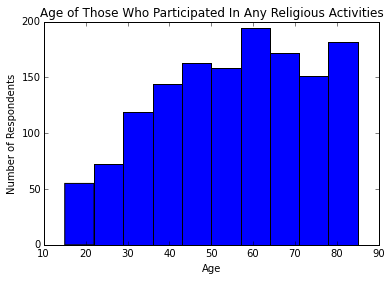

People surveyed who spent any time participating in religious activities had a mean age of 54.67659574468085.


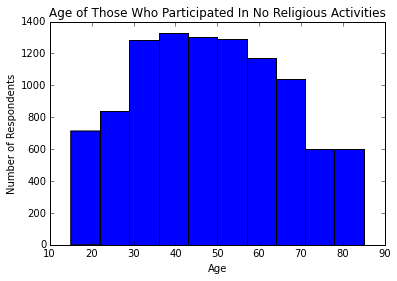

People surveyed who spent no time religious activities had a mean age of 47.983009231978.


In [45]:
any_religious_data['age'].plot(kind='hist', bins=10, title='Age of Those Who Participated In Any Religious Activities')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time participating in religious activities had a mean age of {}.'.format(any_religious_data['age'].mean()))

no__religious_data['age'].plot(kind='hist', bins=10,title='Age of Those Who Participated In No Religious Activities')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time religious activities had a mean age of {}.'.format(no__religious_data['age'].mean()))

In [46]:
print('There was a correlation of {} between age and the amount of time spent participating in religious activities.'.format( total_religious_data['age'].corr(total_religious_data['all_religious_activity'])))

There was a correlation of 0.09777791170321802 between age and the amount of time spent participating in religious activities.


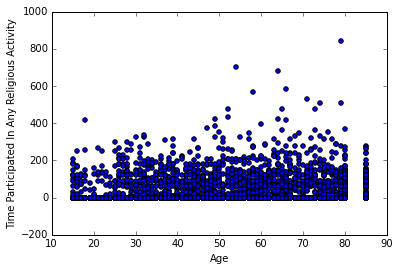

In [47]:
total_religious_data.plot(kind='scatter', y='all_religious_activity', x='age')
plt.ylabel('Time Participated In Any Religious Activity')
plt.xlabel('Age')
plt.show()

In [48]:
print(no__religious_data['num_of_children'].mean())
print(any_religious_data['num_of_children'].mean())

0.797878609311
0.730496453901


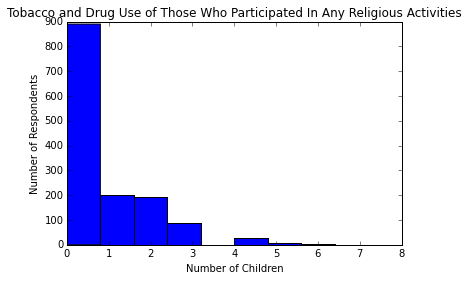

People surveyed who spent any time participating in religious activities had a mean of 0.7304964539007093 children.


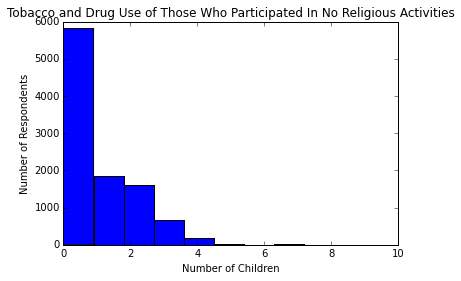

People surveyed who spent no time participating in religious activities had a mean of 0.797878609310548 children.


In [49]:
any_religious_data['num_of_children'].plot(kind='hist', title='Tobacco and Drug Use of Those Who Participated In Any Religious Activities')
plt.xlabel('Number of Children')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time participating in religious activities had a mean of {} children.'.format(any_religious_data['num_of_children'].mean()))

no__religious_data['num_of_children'].plot(kind='hist', title='Tobacco and Drug Use of Those Who Participated In No Religious Activities')
plt.xlabel('Number of Children')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time participating in religious activities had a mean of {} children.'.format(no__religious_data['num_of_children'].mean()))

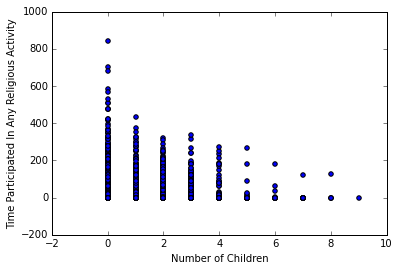

In [50]:
total_religious_data.plot(kind='scatter', y='all_religious_activity', x='num_of_children')
plt.ylabel('Time Participated In Any Religious Activity')
plt.xlabel('Number of Children')
plt.show()

In [51]:
print('There was a correlation of {} between the number of children and the amount of time spent participating in religious activities.'.format( total_religious_data['num_of_children'].corr(total_religious_data['all_religious_activity'])))

There was a correlation of -0.02730360475707316 between the number of children and the amount of time spent participating in religious activities.


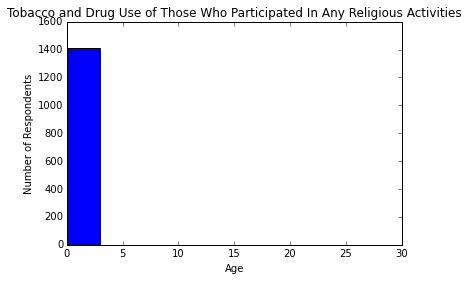

People surveyed who spent any time participating in religious activities spent a mean of 0.03333333333333333 minutes using tobacco and drugs.


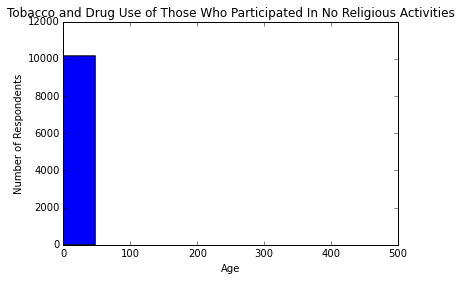

People surveyed who spent no time participating in religious activities spent a mean of 0.4590453741897466 minutes using tobacco and drugs.


In [52]:
any_religious_data['Tobacco and drug use'].plot(kind='hist', title='Tobacco and Drug Use of Those Who Participated In Any Religious Activities')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent any time participating in religious activities spent a mean of {} minutes using tobacco and drugs.'.format(any_religious_data['Tobacco and drug use'].mean()))

no__religious_data['Tobacco and drug use'].plot(kind='hist', title='Tobacco and Drug Use of Those Who Participated In No Religious Activities')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

print('People surveyed who spent no time participating in religious activities spent a mean of {} minutes using tobacco and drugs.'.format(no__religious_data['Tobacco and drug use'].mean()))

In [53]:
print('There was a correlation of {} between the amount of time using tobacco and drugs and the amount of time spent participating in religious activities.'.format( total_religious_data['Tobacco and drug use'].corr(total_religious_data['all_religious_activity'])))

There was a correlation of -0.01709629129662278 between the amount of time using tobacco and drugs and the amount of time spent participating in religious activities.


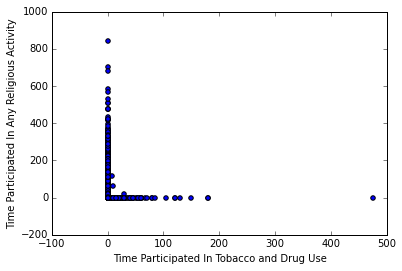

In [54]:
total_religious_data.plot(kind='scatter', y='all_religious_activity', x='Tobacco and drug use')
plt.ylabel('Time Participated In Any Religious Activity')
plt.xlabel('Time Participated In Tobacco and Drug Use')
plt.show()

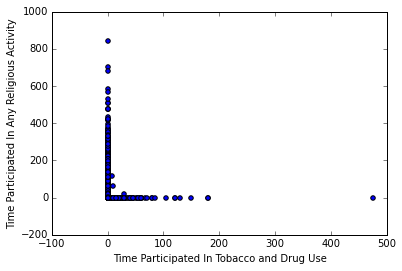

In [55]:
total_religious_data.plot(kind='scatter', y='all_religious_activity', x='Tobacco and drug use')
plt.ylabel('Time Participated In Any Religious Activity')
plt.xlabel('Time Participated In Tobacco and Drug Use')
plt.show()

The above data shows that the mean age of those who participated in religouse activities was higher than respondents who participated in no religious activities. The data points towards a small negative correlation between increased age and increased time spent participating in religious activities. The data also points towards a small negative correlation between an increase in the number of children a respondent has and the amount of time spent participating in religious activities. Lastly those who spant anytime participating in religious activities had a much lower mean amount of time spent using tobacco and drugs than those who spent no time on religious activities.